<a href="https://colab.research.google.com/github/PraloyG18/Stock-Market-Prediction-using-Deep-Learning-Techniques/blob/main/StockMarketPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is the Stock Market Prediction project. Here we will use Deep Learning models

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import All Libraries

# Core utilities
import numpy as np
import pandas as pd
import os
import random

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

# Machine Learning Models
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Deep Learning Models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, GRU, Conv1D, Flatten, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical

# For reproducibility
np.random.seed(42)
random.seed(42)


In [ ]:
data_path = '/content/drive/MyDrive/Stock Market Prediction/large_32.csv'

df = pd.read_csv(data_path)

print("Dataset Loaded Successfully!")
print("Shape:", df.shape)
df.head()

Dataset Loaded Successfully!
Shape: (92514, 26)


,Date Time,Open,High,Low,Close,Volume,SMA 5,SMA 10,SMA 50,RSI 14,...,ALLIGATOR JAW,ALLIGATOR TEETH,ALLIGATOR LIPS,EMA 9,KAMA,KAMA COLOR,ATR,RMA 14,SMOOTH MA 14,WMA 14
0,2024-01-01 9:15:00,21727.75,21737.35,21701.80,21712.00,0,21728.43,21726.69,21725.91,40.436132,...,21729.80,21729.23,21726.73,21725.82,21728.74373,-1,11.198768,21726.67036,21726.67,21726.13333
1,2024-01-01 9:16:00,21711.50,21720.00,21695.35,21695.65,0,21721.38,21723.72,21725.55,33.330775,...,21730.06,21728.76,21722.92,21719.79,21725.60922,-1,12.159570,21724.45462,21724.45,21722.13952
2,2024-01-01 9:17:00,21697.70,21711.75,21694.75,21709.55,0,21716.03,21722.23,21725.51,42.570024,...,21729.70,21727.50,21718.98,21717.74,21725.22943,-1,12.505315,21723.39001,21723.39,21720.28095
3,2024-01-01 9:18:00,21709.55,21712.50,21698.40,21699.55,0,21709.01,21719.84,21725.37,38.442473,...,21729.18,21726.37,21716.28,21714.10,21724.65038,-1,12.619221,21721.68715,21721.69,21717.28714
4,2024-01-01 9:19:00,21704.35,21708.00,21693.55,21693.75,0,21702.10,21716.85,21725.13,36.247261,...,21728.63,21726.15,21713.18,21710.03,21722.09007,-1,12.749991,21719.69164,21719.69,21713.74619


🔹 Dataset Shape: (92514, 26)

🔹 Columns:
 ['Date Time', 'Open', 'High', 'Low', 'Close', 'Volume', 'SMA 5', 'SMA 10', 'SMA 50', 'RSI 14', 'MACD LINE', 'MACD SIGNAL', 'MACD HISTOGRAM', 'BOLLINGER BAND SMA', 'BOLLINGER BAND UPPER', 'BOLLINGER BAND LOWER', 'ALLIGATOR JAW', 'ALLIGATOR TEETH', 'ALLIGATOR LIPS', 'EMA 9', 'KAMA', 'KAMA COLOR', 'ATR', 'RMA 14', 'SMOOTH MA 14', 'WMA 14']

🔹 Data Types:
Date Time                object
Open                    float64
High                    float64
Low                     float64
Close                   float64
Volume                    int64
SMA 5                   float64
SMA 10                  float64
SMA 50                  float64
RSI 14                  float64
MACD LINE               float64
MACD SIGNAL             float64
MACD HISTOGRAM          float64
BOLLINGER BAND SMA      float64
BOLLINGER BAND UPPER    float64
BOLLINGER BAND LOWER    float64
ALLIGATOR JAW           float64
ALLIGATOR TEETH         float64
ALLIGATOR LIPS          floa

,count,mean,std,min,25%,50%,75%,max
Open,92514.0,23482.909109,1287.175428,21147.750000,22238.812500,23658.025000,24564.700000,26273.400000
High,92514.0,23487.745133,1287.095231,21161.550000,22243.612500,23664.050000,24569.187500,26277.350000
Low,92514.0,23477.946221,1287.256287,21137.200000,22233.750000,23651.975000,24559.787500,26270.600000
Close,92514.0,23482.909541,1287.177270,21146.750000,22238.762500,23657.750000,24564.575000,26273.450000
Volume,92514.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
SMA 5,92514.0,23482.867805,1287.173764,21177.700000,22238.100000,23656.800000,24563.910000,26270.670000
SMA 10,92514.0,23482.815776,1287.174930,21205.660000,22238.522500,23656.240000,24563.712500,26269.320000
SMA 50,92514.0,23482.401228,1287.186144,21229.560000,22236.852500,23657.115000,24564.600000,26265.050000
RSI 14,92514.0,50.580917,11.819611,5.960947,42.910430,50.684726,58.299705,92.836791
MACD LINE,92514.0,0.145262,11.028726,-190.080000,-3.840000,0.350000,4.340000,167.900000



🔹 Duplicate Rows: 0


,Date Time,Open,High,Low,Close,Volume,SMA 5,SMA 10,SMA 50,RSI 14,...,ALLIGATOR JAW,ALLIGATOR TEETH,ALLIGATOR LIPS,EMA 9,KAMA,KAMA COLOR,ATR,RMA 14,SMOOTH MA 14,WMA 14
0,2024-01-01 9:15:00,21727.75,21737.35,21701.80,21712.00,0,21728.43,21726.69,21725.91,40.436132,...,21729.80,21729.23,21726.73,21725.82,21728.74373,-1,11.198768,21726.67036,21726.67,21726.13333
1,2024-01-01 9:16:00,21711.50,21720.00,21695.35,21695.65,0,21721.38,21723.72,21725.55,33.330775,...,21730.06,21728.76,21722.92,21719.79,21725.60922,-1,12.159570,21724.45462,21724.45,21722.13952
2,2024-01-01 9:17:00,21697.70,21711.75,21694.75,21709.55,0,21716.03,21722.23,21725.51,42.570024,...,21729.70,21727.50,21718.98,21717.74,21725.22943,-1,12.505315,21723.39001,21723.39,21720.28095
3,2024-01-01 9:18:00,21709.55,21712.50,21698.40,21699.55,0,21709.01,21719.84,21725.37,38.442473,...,21729.18,21726.37,21716.28,21714.10,21724.65038,-1,12.619221,21721.68715,21721.69,21717.28714
4,2024-01-01 9:19:00,21704.35,21708.00,21693.55,21693.75,0,21702.10,21716.85,21725.13,36.247261,...,21728.63,21726.15,21713.18,21710.03,21722.09007,-1,12.749991,21719.69164,21719.69,21713.74619


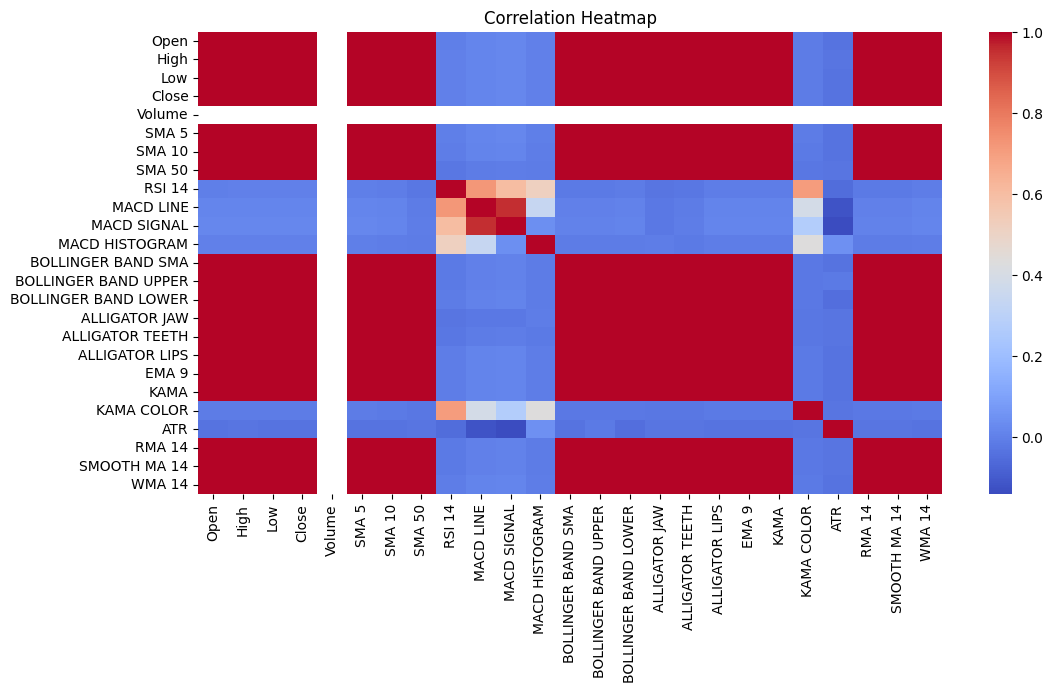

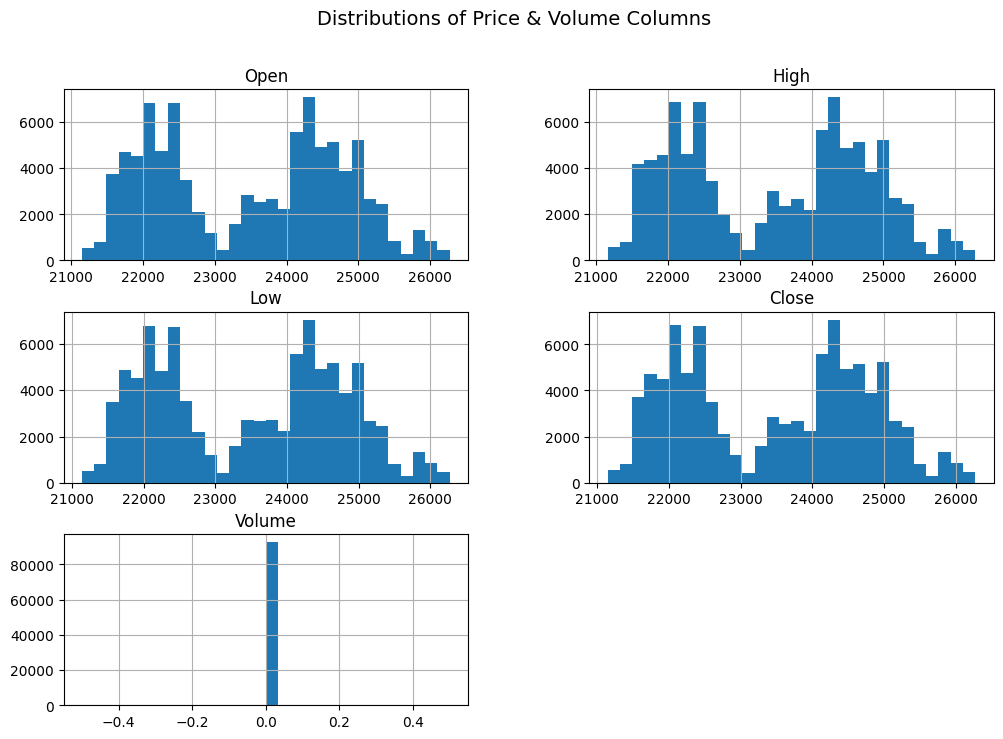

In [ ]:
# Data Understanding & Exploration

# 1️⃣ Basic Info
print("🔹 Dataset Shape:", df.shape)
print("\n🔹 Columns:\n", df.columns.tolist())
print("\n🔹 Data Types:")
print(df.dtypes)

# 2️⃣ Check for Missing Values
print("\n🔹 Missing Values:")
print(df.isnull().sum())

# 3️⃣ Statistical Summary
print("\n🔹 Summary Statistics:")
display(df.describe().T)

# 4️⃣ Check for Duplicates
duplicates = df.duplicated().sum()
print(f"\n🔹 Duplicate Rows: {duplicates}")

# 5️⃣ Quick Preview
display(df.head())

# 6️⃣ Visualize correlations between numerical columns
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap")
plt.show()

# 7️⃣ Distribution of key columns
num_cols = ['Open', 'High', 'Low', 'Close', 'Volume']
df[num_cols].hist(figsize=(12,8), bins=30)
plt.suptitle("Distributions of Price & Volume Columns", fontsize=14)
plt.show()

In [ ]:
# Data Preprocessing + Label Generation

from sklearn.preprocessing import MinMaxScaler

# Handle Missing Values
print("🔹 Missing values before:", df.isnull().sum().sum())
df = df.dropna()  # simplest approach (you can also fill using interpolation)
print("🔹 Missing values after:", df.isnull().sum().sum())

# Sort by Date Time (important for time-series)
df = df.sort_values('Date Time').reset_index(drop=True)

# Normalize numerical features
num_cols = [col for col in df.columns if col != 'Date Time']
scaler = MinMaxScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

print("Normalization complete.")

# Label Generation for Trend Prediction

def get_trend_label(i):
    next_5 = df.iloc[i+1:i+6]
    if len(next_5) < 5:
        return None
    ups = np.sum(next_5['Close'] > next_5['Open'])
    downs = np.sum(next_5['Close'] < next_5['Open'])
    if ups == 5:
        return 'Uptrend'
    elif downs == 5:
        return 'Downtrend'
    else:
        return 'Neutral'

df['label'] = [get_trend_label(i) for i in range(len(df))]
df = df.dropna(subset=['label']).reset_index(drop=True)

print("\n🔹 Label Distribution:")
print(df['label'].value_counts())


🔹 Missing values before: 0
🔹 Missing values after: 0
Normalization complete.

🔹 Label Distribution:
label
Neutral      86428
Uptrend       4256
Downtrend     1825
Name: count, dtype: int64


In [ ]:
# Feature Scaling & Label Encoding

from sklearn.preprocessing import MinMaxScaler, LabelEncoder

# Exclude non-numeric columns
feature_cols = [col for col in df.columns if col not in ['Date Time', 'label']]
scaler = MinMaxScaler()
df[feature_cols] = scaler.fit_transform(df[feature_cols])

# Encode labels
le = LabelEncoder()
df['label_encoded'] = le.fit_transform(df['label'])

print("✅ Scaling and Encoding complete.")
print("Classes:", le.classes_)


✅ Scaling and Encoding complete.
Classes: ['Downtrend' 'Neutral' 'Uptrend']


In [ ]:
# Create Time-Series Sequences

import numpy as np

window_size = 60  # number of past candles used for prediction
X, y = [], []

for i in range(len(df) - window_size):
    X.append(df[feature_cols].iloc[i:i+window_size].values)
    y.append(df['label_encoded'].iloc[i+window_size])

X, y = np.array(X), np.array(y)

print("✅ Sequences created!")
print("Input shape:", X.shape)
print("Output shape:", y.shape)


✅ Sequences created!
Input shape: (92449, 60, 25)
Output shape: (92449,)


In [ ]:
# Train / Validation / Test Split

train_size = int(len(X) * 0.7)
val_size = int(len(X) * 0.15)

X_train, X_val, X_test = (
    X[:train_size],
    X[train_size:train_size+val_size],
    X[train_size+val_size:]
)

y_train, y_val, y_test = (
    y[:train_size],
    y[train_size:train_size+val_size],
    y[train_size+val_size:]
)

print("✅ Data split complete.")
print(f"Train: {len(X_train)}, Val: {len(X_val)}, Test: {len(X_test)}")


✅ Data split complete.
Train: 64714, Val: 13867, Test: 13868


In [ ]:
# ML Model 1 - Random Forest

from imblearn.over_sampling import SMOTE

# Flatten X for traditional model
X_rf = X.reshape(X.shape[0], -1)

# STEP 2 — Split into train/test again
from sklearn.model_selection import train_test_split
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(
    X_rf, y, test_size=0.2, shuffle=False
)

# STEP 3 — Check original class distribution
print("Before balancing:")
unique, counts = np.unique(y_train_rf, return_counts=True)
for cls, cnt in zip(unique, counts):
    print(f"Class {cls}: {cnt}")

# STEP 4 — Apply SMOTE for balancing
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train_rf, y_train_rf)

print("\nAfter balancing:")
unique_res, counts_res = np.unique(y_train_res, return_counts=True)
for cls, cnt in zip(unique_res, counts_res):
    print(f"Class {cls}: {cnt}")

# STEP 5 — Train Random Forest with class_weight='balanced'
rf_balanced = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    class_weight='balanced'
)
rf_balanced.fit(X_train_res, y_train_res)

# STEP 6 — Evaluate
y_pred_rf = rf_balanced.predict(X_test_rf)

acc = accuracy_score(y_test_rf, y_pred_rf)
print(f"\n✅ Random Forest Accuracy (Balanced): {acc:.4f}")
print("\nClassification Report:\n", classification_report(y_test_rf, y_pred_rf))

Before balancing:
Class 0: 1328
Class 1: 69036
Class 2: 3595

After balancing:
Class 0: 69036
Class 1: 69036
Class 2: 69036

✅ Random Forest Accuracy (Balanced): 0.9342

Classification Report:
               precision    recall  f1-score   support

           0       0.02      0.00      0.00       497
           1       0.94      1.00      0.97     17334
           2       0.00      0.00      0.00       659

    accuracy                           0.93     18490
   macro avg       0.32      0.33      0.32     18490
weighted avg       0.88      0.93      0.91     18490



✅ Data balanced using SMOTE
Training shape: (219987, 1500)
✅ XGBoost Accuracy: 0.9403663109316411

Classification Report:
               precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000       339
           1     0.9404    1.0000    0.9693     13041
           2     0.0000    0.0000    0.0000       488

    accuracy                         0.9404     13868
   macro avg     0.3135    0.3333    0.3231     13868
weighted avg     0.8843    0.9404    0.9115     13868



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


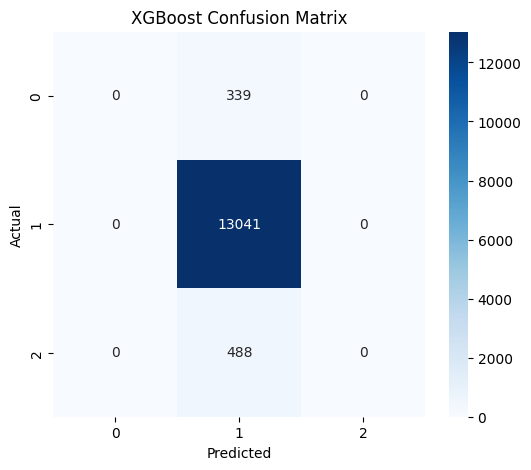

In [ ]:
# ML Model 2 - XGBoost

from imblearn.over_sampling import SMOTE

# Flatten X for traditional model
X_flat = X.reshape(X.shape[0], -1)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_flat, y, test_size=0.15, shuffle=False)

# Handle class imbalance
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print("✅ Data balanced using SMOTE")
print("Training shape:", X_train_res.shape)

# Train XGBoost Model
xgb_model = XGBClassifier(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    tree_method="hist",  # Faster training
    eval_metric="mlogloss"
)

xgb_model.fit(X_train_res, y_train_res)

# Predictions
y_pred = xgb_model.predict(X_test)

# Evaluation
print("✅ XGBoost Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=4))

# Confusion Matrix
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("XGBoost Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional_2 (Bidirectional) │ (None, 60, 256)        │       157,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 60, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_3 (Bidirectional) │ (None, 128)            │       164,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 330,499 (1.26 MB)

 Trainable params: 330,499 (1.26 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
1012/1012 ━━━━━━━━━━━━━━━━━━━━ 450s 438ms/step - accuracy: 0.9297 - loss: 0.3125 - val_accuracy: 0.9365 - val_loss: 0.2832
Epoch 2/50
1012/1012 ━━━━━━━━━━━━━━━━━━━━ 434s 428ms/step - accuracy: 0.9328 - loss: 0.2867 - val_accuracy: 0.9365 - val_loss: 0.2843
Epoch 3/50
1012/1012 ━━━━━━━━━━━━━━━━━━━━ 455s 449ms/step - accuracy: 0.9332 - loss: 0.2840 - val_accuracy: 0.9365 - val_loss: 0.2828
Epoch 4/50
1012/1012 ━━━━━━━━━━━━━━━━━━━━ 452s 446ms/step - accuracy: 0.9321 - loss: 0.2883 - val_accuracy: 0.9365 - val_loss: 0.2850
Epoch 5/50
1012/1012 ━━━━━━━━━━━━━━━━━━━━ 437s 432ms/step - accuracy: 0.9336 - loss: 0.2820 - val_accuracy: 0.9365 - val_loss: 0.2829
Epoch 6/50
1012/1012 ━━━━━━━━━━━━━━━━━━━━ 451s 446ms/step - accuracy: 0.9324 - loss: 0.2854 - val_accuracy: 0.9365 - val_loss: 0.2814
Epoch 7/50
1012/1012 ━━━━━━━━━━━━━━━━━━━━ 449s 444ms/step - accuracy: 0.9338 - loss: 0.2807 - val_accuracy: 0.9365 - val_loss: 0.2843
Epoch 8/50
1012/1012 ━━━━━━━━━━━━━━━━━━━━ 451s 446ms/step - ac

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


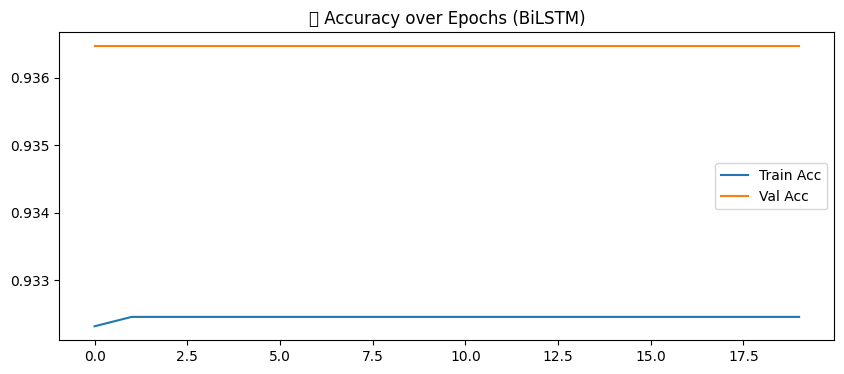

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


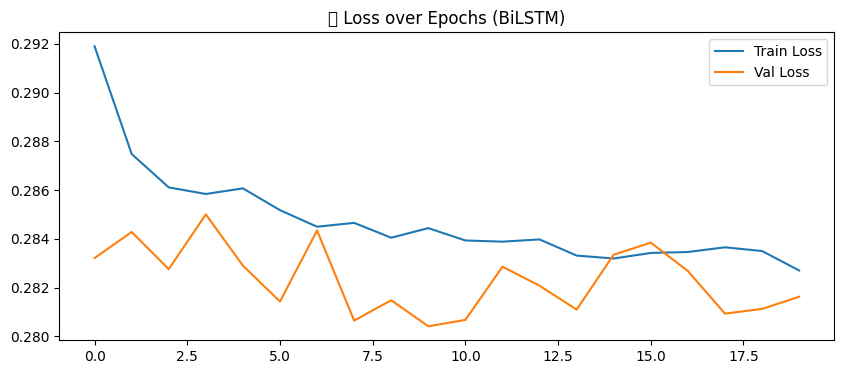

In [ ]:
# DL Model 1 - Long Short-Term Memory(LSTM)

import tensorflow as tf
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import ModelCheckpoint

# Stops training after validation loss hasn't improved for 10 epochs.
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

# Saves the best model weights based on the validation loss.
model_checkpoint = ModelCheckpoint(
    'best_lstm_model.keras',
    monitor='val_loss',
    save_best_only=True,
    verbose=0
)

model = Sequential([
    # BiLSTM for enhanced feature extraction (reading sequence forward and backward)
    Bidirectional(LSTM(128, return_sequences=True),
                  input_shape=(X.shape[1], X.shape[2])),
    Dropout(0.3),

    # Second BiLSTM layer (return_sequences=False for the last sequence layer)
    Bidirectional(LSTM(64)),
    Dropout(0.3),

    # Increase Dense capacity slightly
    Dense(64, activation='relu'),

    # Output Layer
    Dense(num_classes, activation='softmax')
])


# Compile with Adjusted Optimizer

optimized_adam = tf.keras.optimizers.Adam(learning_rate=0.0005)

model.compile(optimizer=optimized_adam, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Model Train

history = model.fit(
    X_train, y_train_cat,
    epochs=50,
    batch_size=64,
    validation_data=(X_val, y_val_cat),
    callbacks=[early_stopping, model_checkpoint],
    verbose=1
)

best_model = tf.keras.models.load_model('best_lstm_model.keras')

test_loss, test_acc = best_model.evaluate(X_test, y_test_cat)
print(f"\n✅ Final Test Accuracy (Best Model): {test_acc:.4f}")

# Plot Training Curves

plt.figure(figsize=(10,4))
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("📈 Accuracy over Epochs (BiLSTM)")
plt.legend()
plt.show()

plt.figure(figsize=(10,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("📉 Loss over Epochs (BiLSTM)")
plt.legend()
plt.show()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5       │ (None, 60, 25)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_10 (Conv1D)  │ (None, 60, 128)   │      9,728 │ input_layer_5[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_10    │ (None, 30, 128)   │          0 │ conv1d_10[0][0]   │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_20          │ (None, 30, 128)   │          0 │ max_pooling1d_10… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_11 (Conv1D)  │ (None, 30, 64)    │     24,640 │ dropout_20[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_11    │ (None, 15, 64)    │          0 │ conv1d_11[0][0]   │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_21          │ (None, 15, 64)    │          0 │ max_pooling1d_11… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional_5     │ (None, 15, 128)   │     66,048 │ dropout_21[0][0]  │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_22          │ (None, 15, 128)   │          0 │ bidirectional_5[… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 15, 128)   │        256 │ dropout_22[0][0]  │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 15, 128)   │    131,968 │ layer_normalizat… │
│ (MultiHeadAttentio… │                   │            │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_6 (Add)         │ (None, 15, 128)   │          0 │ layer_normalizat… │
│                     │                   │            │ multi_head_atten… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 15, 128)   │        256 │ add_6[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_5 (Flatten) │ (None, 1920)      │          0 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_9 (Dense)     │ (None, 128)       │    245,888 │ flatten_5[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_10 (Dense)    │ (None, 128)       │     16,512 │ dense_9[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_7 (Add)         │ (None, 128)       │          0 │ dense_9[0][0],    │
│                     │                   │            │ dense_10[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_24          │ (None, 128)       │          0 │ add_7[0][0]       │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 495,683 (1.89 MB)

 Trainable params: 495,683 (1.89 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
2022/2023 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9311 - loss: 0.3160
Epoch 1: val_loss improved from inf to 0.29456, saving model to best_cnn_bilstm_mha_v2.keras
2023/2023 ━━━━━━━━━━━━━━━━━━━━ 144s 67ms/step - accuracy: 0.9311 - loss: 0.3160 - val_accuracy: 0.9365 - val_loss: 0.2946
Epoch 2/30
2022/2023 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.9318 - loss: 0.2940
Epoch 2: val_loss improved from 0.29456 to 0.28919, saving model to best_cnn_bilstm_mha_v2.keras
2023/2023 ━━━━━━━━━━━━━━━━━━━━ 141s 69ms/step - accuracy: 0.9318 - loss: 0.2939 - val_accuracy: 0.9365 - val_loss: 0.2892
Epoch 3/30
2022/2023 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.9342 - loss: 0.2849
Epoch 3: val_loss improved from 0.28919 to 0.28791, saving model to best_cnn_bilstm_mha_v2.keras
2023/2023 ━━━━━━━━━━━━━━━━━━━━ 137s 68ms/step - accuracy: 0.9342 - loss: 0.2849 - val_accuracy: 0.9365 - val_loss: 0.2879
Epoch 4/30
2022/2023 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9316 - loss

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


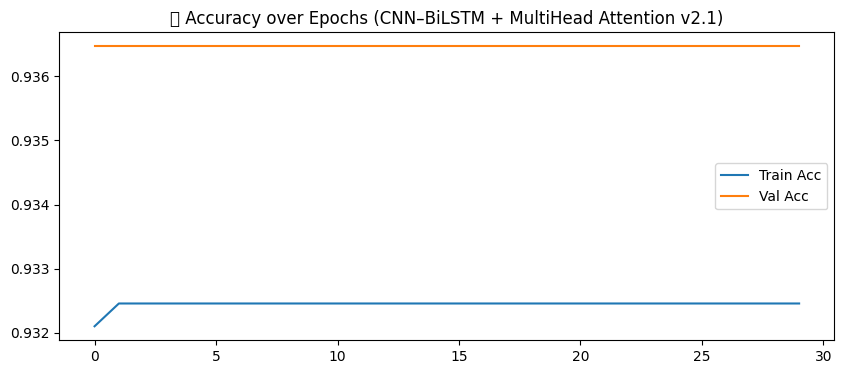

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


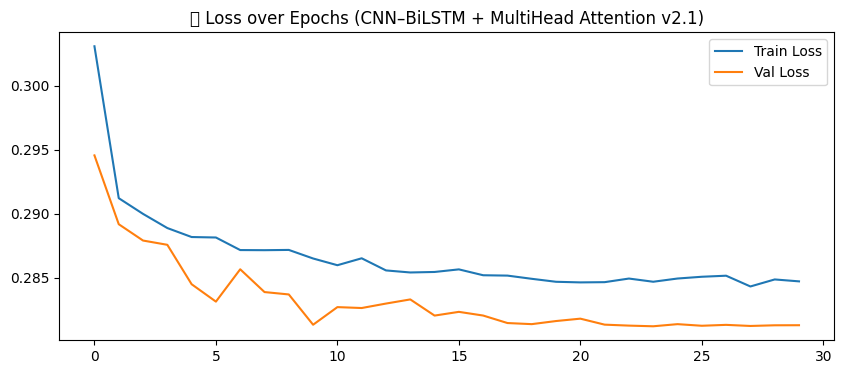

In [ ]:
# DL Model 2 - CNN–BiLSTM + Attention Model

import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (
    Input, Conv1D, MaxPooling1D, Dropout, Bidirectional, LSTM,
    Dense, MultiHeadAttention, LayerNormalization, Flatten, Add
)
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers.schedules import ExponentialDecay

# --- DATA SPLIT ---
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, shuffle=False)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, shuffle=False)

num_classes = len(np.unique(y))
y_train_cat, y_val_cat, y_test_cat = [to_categorical(y, num_classes) for y in [y_train, y_val, y_test]]

# --- Learning Rate Schedule ---
lr_schedule = ExponentialDecay(
    initial_learning_rate=0.0003,
    decay_steps=1000,
    decay_rate=0.9,
    staircase=True
)

# --- Callbacks ---
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True, verbose=1)
model_checkpoint = ModelCheckpoint('best_cnn_bilstm_mha_v2.keras', monitor='val_loss', save_best_only=True, verbose=1)

# --- MODEL ---
inputs = Input(shape=(X.shape[1], X.shape[2]))

# CNN block
x = Conv1D(128, kernel_size=3, activation='relu', padding='same')(inputs)
x = MaxPooling1D(pool_size=2)(x)
x = Dropout(0.3)(x)

x = Conv1D(64, kernel_size=3, activation='relu', padding='same')(x)
x = MaxPooling1D(pool_size=2)(x)
x = Dropout(0.3)(x)

# BiLSTM block
x = Bidirectional(LSTM(64, return_sequences=True))(x)
x = Dropout(0.3)(x)
x = LayerNormalization()(x)

# Multi-Head Attention
attn_out = MultiHeadAttention(num_heads=4, key_dim=64)(x, x)
x = Add()([x, attn_out])  # residual connection
x = LayerNormalization()(x)

# Flatten + Residual Dense Fusion (same dimensions)
x = Flatten()(x)
dense1 = Dense(128, activation='relu')(x)
dense2 = Dense(128, activation='relu')(dense1)
x = Add()([dense1, dense2])  # ✅ same dimension now
x = Dropout(0.3)(x)

# Output
outputs = Dense(num_classes, activation='softmax')(x)

# Compile
model = Model(inputs, outputs)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

# --- TRAIN ---
history = model.fit(
    X_train, y_train_cat,
    epochs=30,
    batch_size=32,
    validation_data=(X_val, y_val_cat),
    callbacks=[early_stopping, model_checkpoint],
    verbose=1
)

# --- EVALUATE ---
best_model = tf.keras.models.load_model('best_cnn_bilstm_mha_v2.keras')
test_loss, test_acc = best_model.evaluate(X_test, y_test_cat)
print(f"\n🚀 Final Test Accuracy (CNN–BiLSTM + MultiHead Attention v2.1): {test_acc:.4f}")

# --- PLOTS ---
plt.figure(figsize=(10,4))
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("📈 Accuracy over Epochs (CNN–BiLSTM + MultiHead Attention v2.1)")
plt.legend()
plt.show()

plt.figure(figsize=(10,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("📉 Loss over Epochs (CNN–BiLSTM + MultiHead Attention v2.1)")
plt.legend()
plt.show()


In [ ]:
# Transformer Encoder Model

import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, LayerNormalization, Dropout, MultiHeadAttention, GlobalAveragePooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Ensure inputs are 3D (samples, timesteps, features)
if len(X_train.shape) == 2:
    X_train = np.expand_dims(X_train, axis=1)
    X_test = np.expand_dims(X_test, axis=1)

# Transformer Encoder Block
def transformer_encoder(inputs, num_heads, ff_dim, dropout=0.1):
    # Multi-Head Attention
    attn_output = MultiHeadAttention(num_heads=num_heads, key_dim=inputs.shape[-1])(inputs, inputs)
    attn_output = Dropout(dropout)(attn_output)
    out1 = LayerNormalization(epsilon=1e-6)(inputs + attn_output)

    # Feed Forward Network
    ffn_output = Dense(ff_dim, activation='relu')(out1)
    ffn_output = Dense(inputs.shape[-1])(ffn_output)
    ffn_output = Dropout(dropout)(ffn_output)
    return LayerNormalization(epsilon=1e-6)(out1 + ffn_output)

# Model Architecture
def build_transformer(input_shape, num_classes):
    inputs = Input(shape=input_shape)
    x = transformer_encoder(inputs, num_heads=8, ff_dim=512, dropout=0.1)
    x = transformer_encoder(x, num_heads=8, ff_dim=512, dropout=0.1)
    x = GlobalAveragePooling1D()(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.3)(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.3)(x)
    outputs = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs, outputs)
    return model

# Build & Compile
num_classes = len(np.unique(y_train))
model = build_transformer(X_train.shape[1:], num_classes)
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train
history = model.fit(X_train, y_train, validation_split=0.2, epochs=40, batch_size=120, verbose=1)

# Evaluate
y_pred = np.argmax(model.predict(X_test), axis=1)
acc = accuracy_score(y_test, y_pred)
print(f"\n✅ Transformer Encoder Accuracy: {acc:.4f}\n")
print("Classification Report:\n", classification_report(y_test, y_pred))

Epoch 1/40
432/432 ━━━━━━━━━━━━━━━━━━━━ 266s 596ms/step - accuracy: 0.8684 - loss: 0.4336 - val_accuracy: 0.9388 - val_loss: 0.2745
Epoch 2/40
432/432 ━━━━━━━━━━━━━━━━━━━━ 235s 544ms/step - accuracy: 0.9312 - loss: 0.3002 - val_accuracy: 0.9388 - val_loss: 0.2799
Epoch 3/40
432/432 ━━━━━━━━━━━━━━━━━━━━ 235s 545ms/step - accuracy: 0.9322 - loss: 0.2931 - val_accuracy: 0.9388 - val_loss: 0.2730
Epoch 4/40
432/432 ━━━━━━━━━━━━━━━━━━━━ 261s 544ms/step - accuracy: 0.9325 - loss: 0.2905 - val_accuracy: 0.9388 - val_loss: 0.2713
Epoch 5/40
432/432 ━━━━━━━━━━━━━━━━━━━━ 234s 541ms/step - accuracy: 0.9326 - loss: 0.2876 - val_accuracy: 0.9388 - val_loss: 0.2739
Epoch 6/40
432/432 ━━━━━━━━━━━━━━━━━━━━ 234s 540ms/step - accuracy: 0.9291 - loss: 0.2995 - val_accuracy: 0.9388 - val_loss: 0.2721
Epoch 7/40
432/432 ━━━━━━━━━━━━━━━━━━━━ 264s 546ms/step - accuracy: 0.9310 - loss: 0.2918 - val_accuracy: 0.9388 - val_loss: 0.2716
Epoch 8/40
432/432 ━━━━━━━━━━━━━━━━━━━━ 234s 542ms/step - accuracy: 0.9307 -

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
